In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import highlight_text

In [12]:
# the famous import font code to use Andale Mono
# Passing 2018 Japan: FIFA World Cup/https://fbref.com/en/squads/ffcf1690/2018/Japan-Men-Stats
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [13]:
#import data
df = pd.read_csv('../../data/Beeswarms/WC2022Japan_Passing.csv')

In [14]:
#set default colors
text_color = 'white'
background = '#313332'

In [15]:
#look at top of dataframe
df.head()

,Player,Pos,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches,-9999
0,Eiji Kawashima,GK,35,4.0,57,89,64.0,2253,1692,10,...,0,0.0,0.0,0,2,0,0,0,Matches,a4527d33
1,Yuto Nagatomo,DF,31,4.0,155,191,81.2,2365,853,88,...,1,0.3,0.7,3,13,2,0,15,Matches,4b6960d2
2,Hiroki Sakai,DF,28,4.0,142,193,73.6,2368,945,63,...,0,0.1,-0.1,2,15,3,2,18,Matches,d63e2912
3,Maya Yoshida,DF,29,4.0,249,290,85.9,5013,1723,81,...,0,0.0,0.0,0,10,0,0,14,Matches,caffaf5a
4,Gaku Shibasaki,MF,26,3.8,193,245,78.8,3947,1016,71,...,1,0.5,0.5,7,17,6,1,21,Matches,d2ac648c


In [16]:
#create a new column for progressive passes per 90
df['per90'] = df['Prog']/df['90s']
df

,Player,Pos,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches,-9999,per90
0,Eiji Kawashima,GK,35,4.0,57,89,64.0,2253,1692,10,...,0.0,0.0,0,2,0,0,0,Matches,a4527d33,0.000000
1,Yuto Nagatomo,DF,31,4.0,155,191,81.2,2365,853,88,...,0.3,0.7,3,13,2,0,15,Matches,4b6960d2,3.750000
2,Hiroki Sakai,DF,28,4.0,142,193,73.6,2368,945,63,...,0.1,-0.1,2,15,3,2,18,Matches,d63e2912,4.500000
3,Maya Yoshida,DF,29,4.0,249,290,85.9,5013,1723,81,...,0.0,0.0,0,10,0,0,14,Matches,caffaf5a,3.500000
4,Gaku Shibasaki,MF,26,3.8,193,245,78.8,3947,1016,71,...,0.5,0.5,7,17,6,1,21,Matches,d2ac648c,5.526316
5,Yuya Osako,FW,28,3.4,52,78,66.7,844,109,29,...,0.4,-0.4,6,3,2,0,3,Matches,f69fba57,0.882353
6,Takashi Inui,FWMF,30,3.2,106,127,83.5,1686,326,53,...,0.6,0.4,2,3,2,0,8,Matches,61bd33d0,2.500000
7,Makoto Hasebe,MF,34,3.1,183,210,87.1,3292,596,74,...,0.0,0.0,1,12,0,0,6,Matches,9ab16552,1.935484
8,Gen Shoji,DF,25,3.0,159,179,88.8,3310,1063,53,...,0.0,0.0,0,10,0,0,13,Matches,8b28686a,4.333333
9,Genki Haraguchi,FWMF,27,2.7,73,86,84.9,1088,186,42,...,0.1,-0.1,2,5,1,1,4,Matches,f24ea523,1.481481


In [17]:
#filter the dataframe so it is only players who have played more than 6.5 90's which is about 585 minutes
df = df[df['90s']>=0.6].reset_index()
df

,index,Player,Pos,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches,-9999,per90
0,0,Eiji Kawashima,GK,35,4.0,57,89,64.0,2253,1692,...,0.0,0.0,0,2,0,0,0,Matches,a4527d33,0.000000
1,1,Yuto Nagatomo,DF,31,4.0,155,191,81.2,2365,853,...,0.3,0.7,3,13,2,0,15,Matches,4b6960d2,3.750000
2,2,Hiroki Sakai,DF,28,4.0,142,193,73.6,2368,945,...,0.1,-0.1,2,15,3,2,18,Matches,d63e2912,4.500000
3,3,Maya Yoshida,DF,29,4.0,249,290,85.9,5013,1723,...,0.0,0.0,0,10,0,0,14,Matches,caffaf5a,3.500000
4,4,Gaku Shibasaki,MF,26,3.8,193,245,78.8,3947,1016,...,0.5,0.5,7,17,6,1,21,Matches,d2ac648c,5.526316
5,5,Yuya Osako,FW,28,3.4,52,78,66.7,844,109,...,0.4,-0.4,6,3,2,0,3,Matches,f69fba57,0.882353
6,6,Takashi Inui,FWMF,30,3.2,106,127,83.5,1686,326,...,0.6,0.4,2,3,2,0,8,Matches,61bd33d0,2.500000
7,7,Makoto Hasebe,MF,34,3.1,183,210,87.1,3292,596,...,0.0,0.0,1,12,0,0,6,Matches,9ab16552,1.935484
8,8,Gen Shoji,DF,25,3.0,159,179,88.8,3310,1063,...,0.0,0.0,0,10,0,0,13,Matches,8b28686a,4.333333
9,9,Genki Haraguchi,FWMF,27,2.7,73,86,84.9,1088,186,...,0.1,-0.1,2,5,1,1,4,Matches,f24ea523,1.481481


In [18]:
df.describe()

,index,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,per90
count,18.000000,18.00000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,16.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,8.500000,29.00000,2.450000,97.333333,119.444444,79.544444,1778.944444,559.222222,43.055556,47.833333,...,59.043750,0.277778,0.166667,0.111111,1.833333,6.500000,1.277778,0.222222,7.388889,3.015717
std,5.338539,2.99018,1.344816,70.646594,82.806807,9.699983,1415.882534,542.348331,27.709570,29.470324,...,18.976124,0.460889,0.219625,0.316021,2.281640,5.338539,1.601674,0.548319,6.390608,1.909970
min,0.000000,25.00000,0.600000,13.000000,16.000000,57.100000,146.000000,21.000000,8.000000,10.000000,...,25.000000,0.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,27.00000,1.000000,35.500000,51.000000,73.300000,508.750000,123.500000,13.000000,19.250000,...,45.850000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,1.527778
50%,8.500000,28.50000,2.850000,84.000000,94.000000,82.950000,1597.500000,360.000000,43.000000,46.500000,...,60.000000,0.000000,0.050000,0.000000,1.000000,4.000000,1.000000,0.000000,5.500000,3.250000
75%,12.750000,31.00000,3.700000,151.750000,188.000000,86.800000,2367.250000,922.000000,69.000000,77.000000,...,73.500000,0.750000,0.275000,0.300000,2.000000,10.000000,2.000000,0.000000,12.250000,4.458333
max,17.000000,35.00000,4.000000,249.000000,290.000000,91.900000,5013.000000,1723.000000,88.000000,98.000000,...,100.000000,1.000000,0.600000,0.800000,7.000000,17.000000,6.000000,2.000000,21.000000,6.250000


In [19]:
df = df.sort_values(by='per90',ascending=False)

In [20]:
df = df[df['Pos'] != 'GK']

In [30]:
df.head(10)

,index,Player,Pos,Age,90s,Cmp,Att,Cmp%,TotDist,PrgDist,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches,-9999,per90
16,16,Takashi Usami,MF,26,0.8,24,42,57.1,397,152,...,0.2,-0.2,2,3,2,0,5,Matches,2bed2986,6.250000
4,4,Gaku Shibasaki,MF,26,3.8,193,245,78.8,3947,1016,...,0.5,0.5,7,17,6,1,21,Matches,d2ac648c,5.526316
11,11,Hotaru Yamaguchi,MF,27,1.2,91,99,91.9,1509,453,...,0.0,0.0,0,7,1,0,6,Matches,8c147c14,5.000000
12,12,Tomoaki Makino,DF,31,1.0,77,87,88.5,1356,334,...,0.0,0.0,0,2,0,0,5,Matches,2b0b6462,5.000000
2,2,Hiroki Sakai,DF,28,4.0,142,193,73.6,2368,945,...,0.1,-0.1,2,15,3,2,18,Matches,d63e2912,4.500000
8,8,Gen Shoji,DF,25,3.0,159,179,88.8,3310,1063,...,0.0,0.0,0,10,0,0,13,Matches,8b28686a,4.333333
10,10,Shinji Kagawa,MF,29,2.6,120,142,84.5,1747,386,...,0.6,0.4,6,10,3,0,10,Matches,5afafbfe,3.846154
1,1,Yuto Nagatomo,DF,31,4.0,155,191,81.2,2365,853,...,0.3,0.7,3,13,2,0,15,Matches,4b6960d2,3.750000
3,3,Maya Yoshida,DF,29,4.0,249,290,85.9,5013,1723,...,0.0,0.0,0,10,0,0,14,Matches,caffaf5a,3.500000
13,13,Gōtoku Sakai,MF,27,1.0,14,17,82.4,200,56,...,0.0,0.0,1,2,0,0,3,Matches,c8e25f78,3.000000


Text(0.5, 0, 'Progressive Passes per 90')

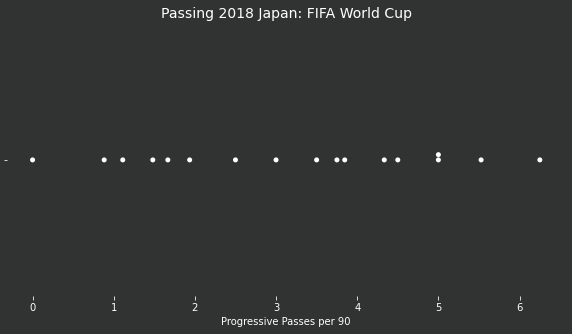

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

sns.swarmplot(x='per90',data=df,color='white',zorder=1)

df

#plot 
# plt.scatter(x=9.87,y=0,c='red',edgecolor='white',s=200,zorder=2)
# plt.scatter(x=7.564,y=0,c='blue',edgecolor='white',s=200,zorder=2)

plt.title('Passing 2018 Japan: FIFA World Cup',c=text_color,fontsize=14)

plt.xlabel('Progressive Passes per 90',c=text_color)



#plt.savefig('swarm.png',dpi=500,bbox_inches = 'tight',facecolor=background)

In [184]:
#import our next dataframe
df2 = pd.read_csv('beeswarm2.csv')

In [185]:
df2.head(10)

,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.8,0.2,11,43,21,4,76
1,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.9,0.1,8,12,2,0,11
2,Che Adams\Che-Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,4.3,-0.3,22,20,12,0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.1,-0.1,3,39,2,0,36
4,Adrián\Adrian,es ESP,GK,Liverpool,2.0,43,62,69.4,1147,723,0,0.0,0.0,0,0,0,0,0
5,Sergio Agüero\Sergio-Aguero,ar ARG,FW,Manchester City,1.6,33,42,78.6,386,58,0,0.6,-0.6,3,2,1,0,1
6,Ola Aina\Ola-Aina,ng NGA,DF,Fulham,17.7,782,1013,77.2,15293,6132,0,0.3,-0.3,8,66,11,6,69
7,Rayan Aït Nouri\Rayan-Ait-Nouri,fr FRA,DF,Wolves,7.7,299,357,83.8,4712,1364,1,0.7,0.3,6,13,6,3,18
8,Semi Ajayi\Semi-Ajayi,ng NGA,DF,West Brom,22.0,553,763,72.5,12087,5164,0,0.1,-0.1,2,50,3,0,46
9,Nathan Aké\Nathan-Ake,nl NED,DF,Manchester City,5.2,429,461,93.1,7845,2158,0,0.0,0.0,1,36,0,0,23


In [186]:
#do some data preprocessing and cleaning

#split the player names
df2['Player'] = df2['Player'].str.split('\\',expand=True)[0]

df2 = df2[df2['Pos'] != 'GK']

df2 = df2[df2['90s'] > 6.5].reset_index()

In [187]:
#make the per 90 stats
#metrics = ['Prog90','1/390','xA90','Cmp%','KP90','PPA90']
df2['Prog'] = df2['Prog'] / df2['90s']
df2['1/3'] = df2['1/3'] / df2['90s']
df2['xA'] = df2['xA'] / df2['90s']
df2['KP'] = df2['KP'] / df2['90s']
df2['PPA'] = df2['PPA'] / df2['90s']

In [188]:
print(df2.head())

df2.Player.unique()

   index               Player   Nation Pos           Squad   90s  Cmp   Att  \
0      0  Patrick van Aanholt   nl NED  DF  Crystal Palace  11.7  573   705   
1      1        Tammy Abraham  eng ENG  FW         Chelsea  10.6  138   201   
2      2            Che Adams  eng ENG  FW     Southampton  19.0  288   413   
3      3     Tosin Adarabioyo  eng ENG  DF          Fulham  18.0  779   905   
4      6             Ola Aina   ng NGA  DF          Fulham  17.7  782  1013   

   Cmp%  TotDist  PrgDist  Ast        xA  A-xA        KP       1/3       PPA  \
0  81.3     9485     4365    1  0.068376   0.2  0.940171  3.675214  1.794872   
1  68.7     1925      327    1  0.084906   0.1  0.754717  1.132075  0.188679   
2  69.7     4739     1079    4  0.226316  -0.3  1.157895  1.052632  0.631579   
3  86.1    18458     6406    0  0.005556  -0.1  0.166667  2.166667  0.111111   
4  77.2    15293     6132    0  0.016949  -0.3  0.451977  3.728814  0.621469   

   CrsPA      Prog  
0      4  6.495726  
1 

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Ola Aina', 'Rayan Aït Nouri', 'Semi Ajayi',
       'Marc Albrighton', 'Thiago Alcántara', 'Toby Alderweireld',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Allan',
       'Miguel Almirón', 'Steven Alzate', 'Ethan Ampadu',
       'Joachim Andersen', 'Michail Antonio', 'Stuart Armstrong',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Jordan Ayew',
       'Luke Ayling', 'César Azpilicueta', 'Fabián Balbuena',
       'George Baldock', 'Patrick Bamford', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Héctor Bellerín',
       'Saïd Benrahma', 'Christian Benteke', 'Jóhann Berg Guðmundsson',
       'Sander Berge', 'Steven Bergwijn', 'Ryan Bertrand',
       'Yves Bissouma', 'Jayden Bogle', 'Willy Boly', 'Jarrod Bowen',
       'Robbie Brady', 'Rhian Brewster', 'Josh Brownhill', 'Oliver Burke',
       'Dan Burn',

In [189]:
#create a list of 6 metrics to compare
metrics = ['Prog','1/3','xA','Cmp%','KP','PPA']

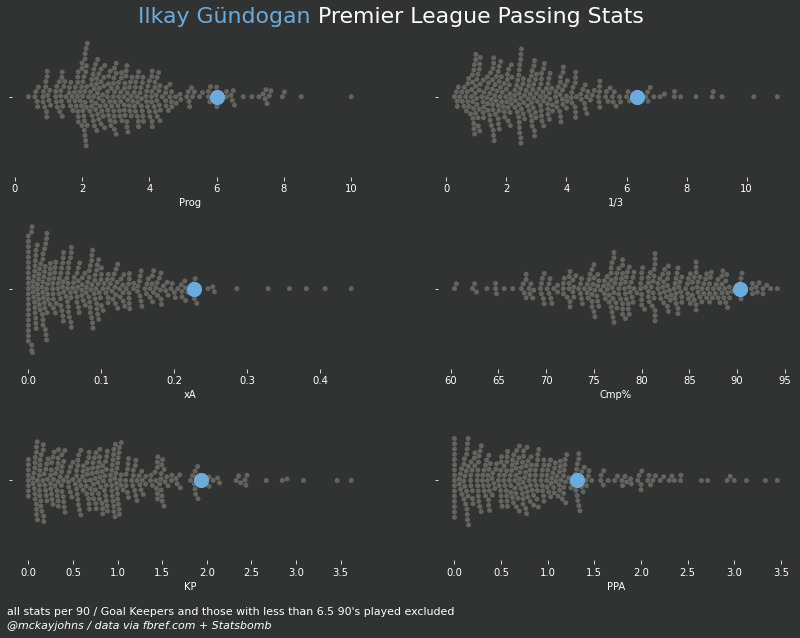

In [232]:
fig,axes = plt.subplots(3,2,figsize=(14,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#create a list of comparisons
counter=0
counter2=0
met_counter = 0

for i,ax in zip(df2['Player'],axes.flatten()):
    ax.set_facecolor(background)
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
    
    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)
            
    sns.swarmplot(x=metrics[met_counter],data=df2,ax=axes[counter,counter2],zorder=1,color='#64645e')
    ax.set_xlabel(f'{metrics[met_counter]}',c='white')
    
    for x in range(len(df2['Player'])):
        #if df2['Player'][x] == 'Thiago Alcántara':
            #ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='red',zorder=2)
        if df2['Player'][x] == 'İlkay Gündoğan':
            ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='#6CABDD',zorder=2)
                        
    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue
    if counter2 == 1:
        counter2 = 0
        counter+=1
        

        
s='<Ilkay Gündogan> Premier League Passing Stats'
highlight_text.fig_text(s=s,
                x=.25, y=.88,
                #highlight_weights = ['bold'],
                fontsize=22,
                fontfamily = 'Andale Mono',
                color = text_color,
                highlight_colors = ['#6CABDD'],
                va='center'
               )

fig.text(.12,.05,"all stats per 90 / Goal Keepers and those with less than 6.5 90's played excluded",fontsize=11, fontfamily='Andale Mono',color=text_color)
fig.text(.12,.03,"@mckayjohns / data via fbref.com + Statsbomb", fontstyle='italic',fontsize=11, fontfamily='Andale Mono',color=text_color)

plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)